In [1]:
import anndata as ad
adata = ad.read_h5ad('pbmc.h5ad')
adata_ctrl = adata[adata.obs['condition'] == 'control'].copy()
adata_ctrl.obs_names_make_unique()
adata_ctrl.var_names_make_unique()
adata_ctrl

/home/Disk14T/wjl/tools/anaconda3/envs/wjl/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/Disk14T/wjl/tools/anaconda3/envs/wjl/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 8943 × 6998
    obs: 'condition', 'n_counts', 'n_genes', 'mt_frac', 'cell_type', 'condition_cell_type'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [2]:
import numpy as np
normalized_mtx = np.expm1(adata_ctrl.X.toarray()).T
normalized_mtx.shape

(6998, 8943)

In [3]:
import pandas as pd
cell_expression = pd.DataFrame(normalized_mtx, index = adata_ctrl.var_names, columns = adata_ctrl.obs_names)
cell_expression

index,AAACATACAATGCC-1-control,AAACATACATTTCC-1-control,AAACATACCAGAAA-1-control,AAACATACCAGCTA-1-control,AAACATACCTCGCT-1-control,AAACATACCTGGTA-1-control,AAACATACGATGAA-1-control,AAACATACGGCATT-1-control,AAACATACTGCGTA-1-control,AAACATACTGCTGA-1-control,...,CGCCATACCCATAG-1-control-1,GCGAGAGAAGTGCT-1-control-1,ACGAAGCTTCGTGA-1-control-1,GCAACCCTCCAATG-1-control-1,AATTGATGCCACCT-1-control-1,AAGTAACTGTCAAC-1-control-1,TTAGGGACTGAAGA-1-control-1,TACTGTTGCTGCTC-1-control-1,GACCTCACAGATCC-1-control-1,CCAGCTACCCGTTC-1-control-1
index,,,,,,,,,,,,,,,,,,,,,
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-206L10.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LINC00115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NOC2L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KLHL17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLC19A1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COL6A2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FTCD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
cell_expression.to_csv('./cell_expression.txt', sep='\t')

In [5]:
cell_annotations = pd.DataFrame(adata_ctrl.obs['cell_type'], columns = ['cell_type'])
cell_annotations

,cell_type
index,
AAACATACAATGCC-1-control,CD4T
AAACATACATTTCC-1-control,Dendritic
AAACATACCAGAAA-1-control,CD14+Mono
AAACATACCAGCTA-1-control,CD14+Mono
AAACATACCTCGCT-1-control,CD14+Mono
...,...
AAGTAACTGTCAAC-1-control-1,CD4T
TTAGGGACTGAAGA-1-control-1,CD4T
TACTGTTGCTGCTC-1-control-1,CD4T


In [6]:
cell_annotations.to_csv('./cell_annotations.txt', sep = '\t')

cytotrace2: Input parameters
    Input file: ./cell_expression.txt
    Species: human
    Parallelization enabled: True
    Batch size: 20000
    Smoothing batch size: 1000
    Seed: 14
    Output directory: cytotrace2_results
    Plotting enabled: True
    Verbose mode enabled: True
    User-provided limit for number of cores to use: None
       ...96 cores detected. CytoTRACE 2 will run using up to 48/96 cores.
cytotrace2: Loading dataset
cytotrace2: Dataset characteristics
    Number of input genes:  6998
    Number of input cells:  8943
cytotrace2: Computing UMAP embeddings from full expression


/home/Disk14T/wjl/tools/anaconda3/envs/wjl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cytotrace2: The passed batch_size is greater than the number of cells in the subsample. 
    Now setting batch_size to 8943.
cytotrace2: Preprocessing
cytotrace2: Running 1 prediction batch(es) sequentially using 20 cores per batch.
cytotrace2: Initiated processing batch 1/1 with 8943 cells
    Mapped 5390 input gene names to mouse orthologs
    5390 input genes are present in the model features.


/home/Disk14T/wjl/tools/anaconda3/envs/wjl/lib/python3.12/site-packages/cytotrace2_py/common/gen_utils.py:205: UserWarning:     Please verify the input species is correct.
    In case of a correct species input, be advised that model performance might be compromised due to gene space differences.
  warnings.warn("    Please verify the input species is correct.\n    In case of a correct species input, be advised that model performance might be compromised due to gene space differences.")
/home/Disk14T/wjl/tools/anaconda3/envs/wjl/lib/python3.12/site-packages/cytotrace2_py/cytotrace2_py.py:178: UserWarning: 95.4% of input cells express fewer than 500 genes. For best results, a minimum gene count of 500-1000 is recommended. 
    Please see FAQ for guidelines at https://github.com/digitalcytometry/cytotrace2#frequently-asked-questions
  smooth_by_knn_df = process_subset(idx, chunked_expression, B, smooth_batch_size, smooth_cores_to_use, species, use_model_dir, output_dir, seed, disable_ver

cytotrace2: Performing initial model prediction
cytotrace2: Performing smoothing by diffusion
cytotrace2: Performing smoothing by adaptive KNN
cytotrace2: Plotting outputs


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

cytotrace2: Finished.


,CytoTRACE2_Score,CytoTRACE2_Potency,CytoTRACE2_Relative,preKNN_CytoTRACE2_Score,preKNN_CytoTRACE2_Potency
AAACATACAATGCC-1-control,0.133957,Differentiated,0.513640,0.162044,Differentiated
AAACATACATTTCC-1-control,0.071754,Differentiated,0.269606,0.000224,Differentiated
AAACATACCAGAAA-1-control,0.082649,Differentiated,0.312348,0.066137,Differentiated
AAACATACCAGCTA-1-control,0.082773,Differentiated,0.312837,0.070816,Differentiated
AAACATACCTCGCT-1-control,0.047797,Differentiated,0.175618,0.010271,Differentiated
...,...,...,...,...,...
AAGTAACTGTCAAC-1-control-1,0.075877,Differentiated,0.285781,0.127931,Differentiated
TTAGGGACTGAAGA-1-control-1,0.132425,Differentiated,0.507629,0.156004,Differentiated
TACTGTTGCTGCTC-1-control-1,0.107043,Differentiated,0.408051,0.091116,Differentiated
GACCTCACAGATCC-1-control-1,0.099821,Differentiated,0.379719,0.099318,Differentiated


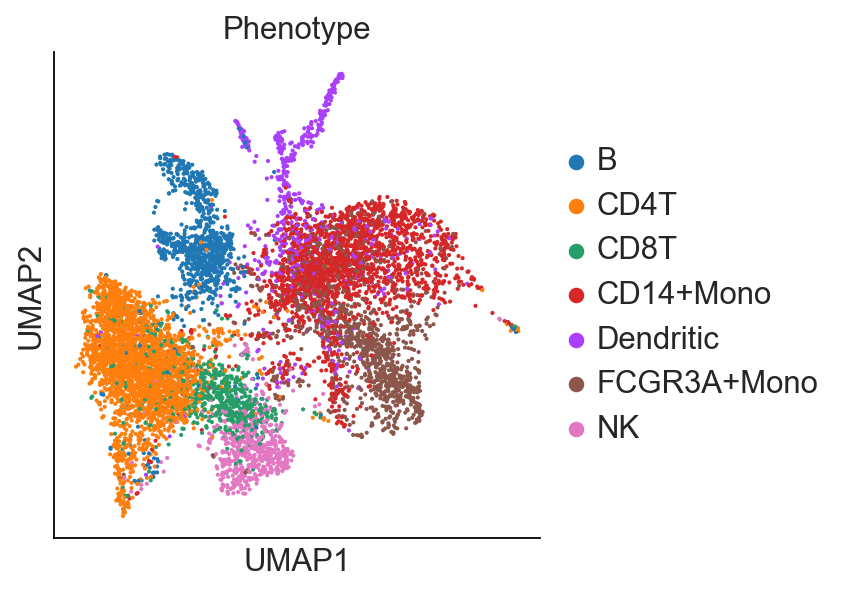

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

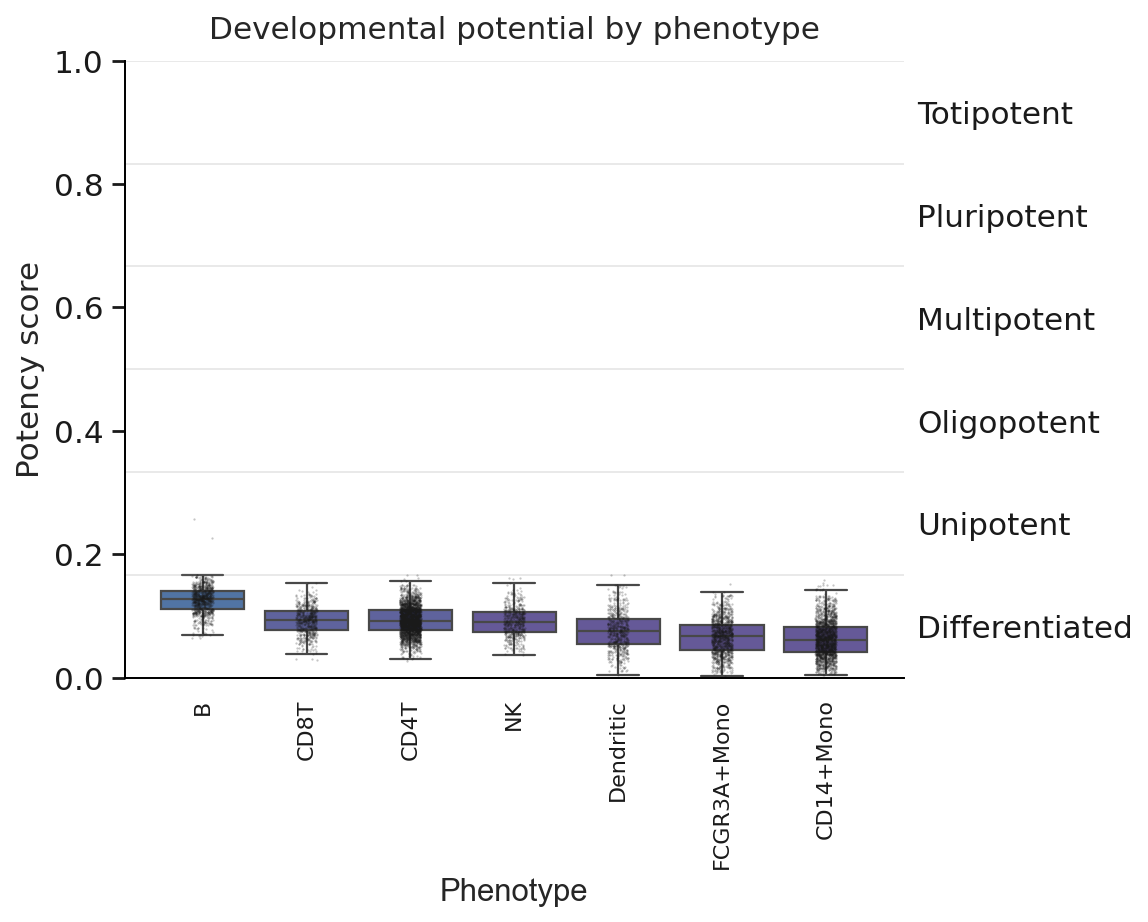

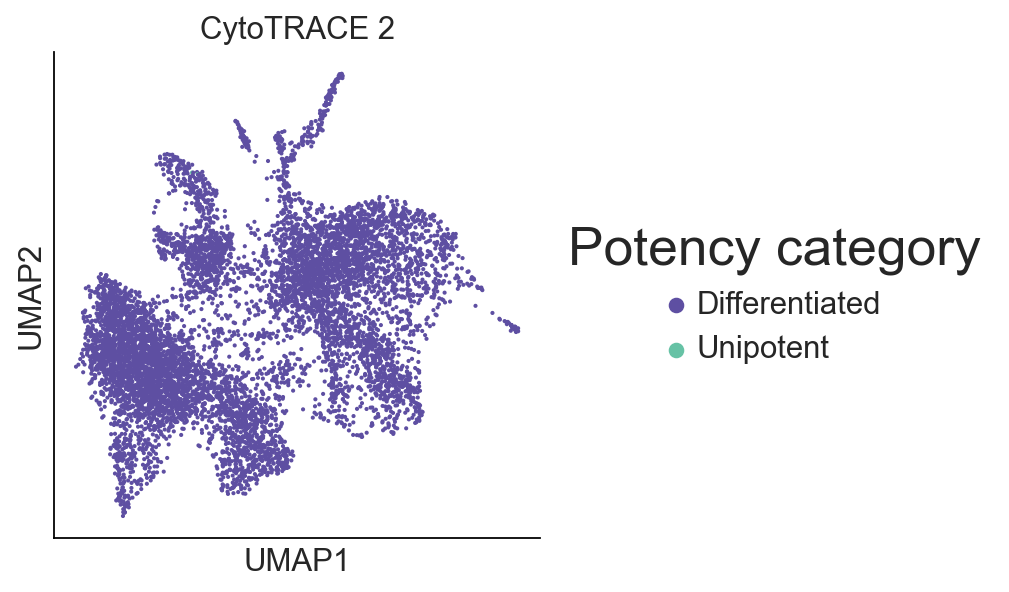

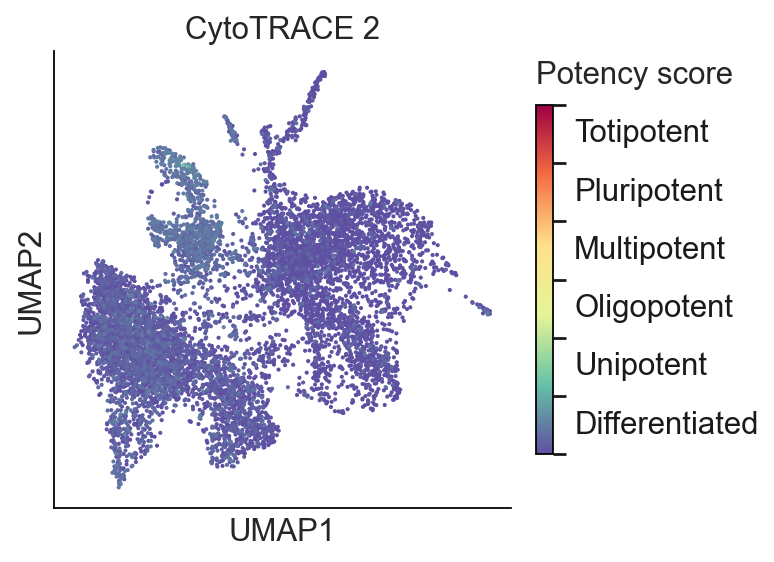

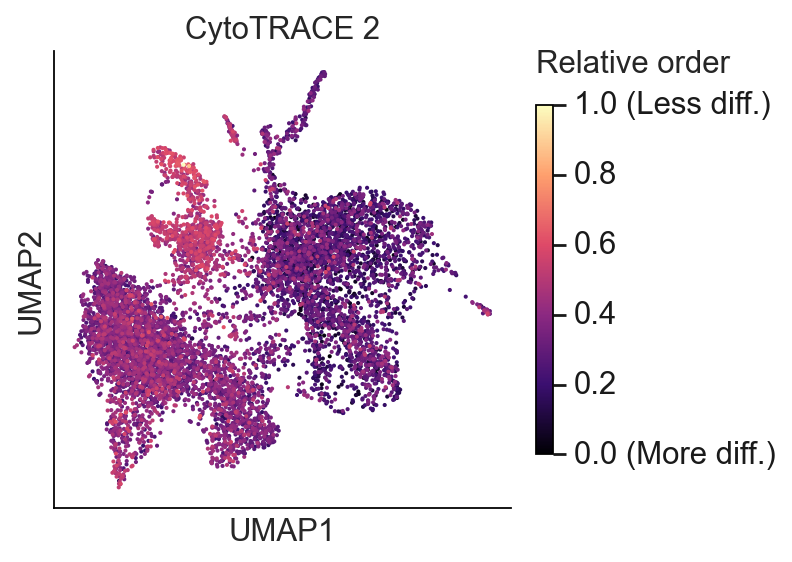

In [7]:
import seaborn as sns
sns.set_theme(style = 'white', font = 'Arial', font_scale = 2)
import cytotrace2_py as ct
input_path = './cell_expression.txt'
annotation_path = './cell_annotations.txt'
species = 'human'
res = ct.cytotrace2(input_path = input_path, annotation_path = annotation_path, species = species)
res